In [86]:
# First we need to import all of the packages we will be using!
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [87]:
# initial caspase model
def caspase_model(states,t):
    # Our "states" list has the state variables in the following order:
    # C8, proC3, C8proC3, C3
    C8 = states[0]
    proC3 = states[1]
    C8proC3 = states[2]
    C3 = states[3]
   
    ### implement the change equations to reflect the new model
    C8_prime = -k_a*C8*proC3 + k_d*C8proC3 + k_c*C8proC3 + delta*C8proC3 
    proC3_prime = -k_a*proC3*C8 + k_d*C8proC3 + Q - delta*proC3
    C8proC3_prime =k_a*proC3*C8 -k_d*C8proC3 - k_c*C8proC3 -delta*C8proC3
    C3_prime = k_c*C8proC3 - delta*C3



    ###
    
    statesprime = [C8_prime, proC3_prime,C8proC3_prime, C3_prime]
    return statesprime

In [88]:
# INITIAL CONCENTRATIONS & PARAMETERS
# This is where we will define the initial conditions and parameters that we won't change for different simulations

#initial conditions
proC3_0 = 1
C8proC3_0 =0
C3_0 = 0

#parameters
k_a = 1
k_d = 0.1
k_c = 10
delta = 2e-4

### enter your expression for the value of Q (synthesis rate of proC3)
Q = proC3_0*delta
###

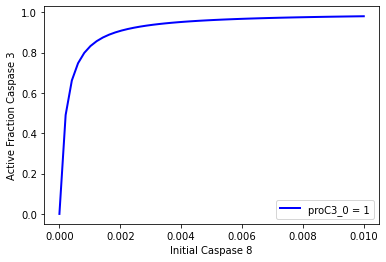

In [89]:
# STEADY-STATE responses of initial caspase model

# Here, we define our list of C8_0 values:
C8_values = np.linspace(0, 0.01)

#These will be the lists that hold the results
ss_results = []

for C8_0 in C8_values:
    # First, we create our initial conditions
    # We do this inside the for loop because C8_0 is changing
    states0 = [C8_0, proC3_0, C8proC3_0, C3_0]
    # To intgrate ODEs, we need a "t" vector for time
    # Note that the units on "t" are in seconds
    t = np.linspace(0,100000,1000)
    # Now, integrate the ODEs and put the results in "solution"
    solution = odeint(caspase_model,states0,t)
    # Now, calculate our steady state output, C3/proc3_0
    # (the concentration of cleaved caspase 3 divided by the total initial concentration of pro-caspase 3)
    norm_C3 = solution[999,3]/proC3_0
    # Append this result to the vector of our results
    ss_results.append(norm_C3)

plt.plot(C8_values,ss_results,'b-',linewidth=2, label = "proC3_0 = "+str(proC3_0))
plt.xlabel('Initial Caspase 8')
plt.ylabel('Active Fraction Caspase 3')
plt.legend()
plt.show()

In [90]:
#simple caspase model with feedback and FLIP
# Our "states" list has the state variables in the following order:
# proC8, C8, proC3, R, F, RF
def caspase_FLIP_model(states,t):
    proC8 = states[0]
    C8 = states[1]
    proC3 = states[2]
    C3 = states[3]
    R = states[4]
    F = states[5]
    RF = states[6]
   
    ### ADD your change equations here
    proC8prime = QC8 - delta*proC8 - k_ba*proC8*R -k_a*C3*proC8
    C8prime = k_ba*proC8*R - delta*C8 +k_a*C3*proC8
    proC3prime = QC3 - delta*proC3 -k_a*proC3*C8 
    C3prime = -delta*C3  + k_a*proC3*C8
    Rprime = -kp*F*R +km*RF
    Fprime = -kp*F*R + km*RF
    RFprime = -km*RF + kp*F*R

    ###
    
    statesprime = [proC8prime,C8prime,proC3prime,C3prime,Rprime,Fprime,RFprime]
    return statesprime

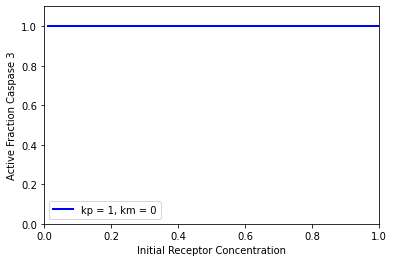

In [91]:
# STEADY-STATE responses of feedback + FLIP model

#INITIAL CONDITIONS
proC8_0 = 1
C8_0 = 0
proC3_0 = 1
C3_0 = 0
F_0 = 1
RF_0 = 0

#parameters
k_a = 1
k_ba = 0.001
kp = 1# modify this parameter
km = 0# modify this parameter
delta = 2e-4
QC8 = proC8_0*delta
QC3 = proC3_0*delta

# Here, we define our list of R_0 values:
R_values = np.linspace(0.01,1,100)

#These will be the lists that hold the results
ss_results = []

for R_0 in R_values:
    # First, we create our initial conditions
    # We do this inside the for loop because R_0 is changing
    states0 = [proC8_0,C8_0,proC3_0,C3_0,R_0,F_0,RF_0]
    # To intgrate ODEs, we need a "t" vector for time
    # Note that the units on "t" are in seconds
    t = np.linspace(0,100000,1000)
    # Now, integrate the ODEs and put the results in "solution"
    solution = odeint(caspase_FLIP_model,states0,t)
    # Now, calculate our steady state output, C3/proc3_0
    # (the concentration of cleaved caspase 3 divided by the total initial concentration of pro-caspase 3)
    norm_C3 = solution[999,3]/proC3_0
    # Append this result to the vector of our results
    ss_results.append(norm_C3)

plt.plot(R_values,ss_results,'b-',linewidth=2, label = "kp = " +str(kp) +", km = " +str(km))
plt.xlabel('Initial Receptor Concentration')
plt.ylabel('Active Fraction Caspase 3')
# We have to add an extra directive here to make sure the y-axis prints correctly
plt.axis([0,1,0,1.1])
plt.legend()
plt.show()

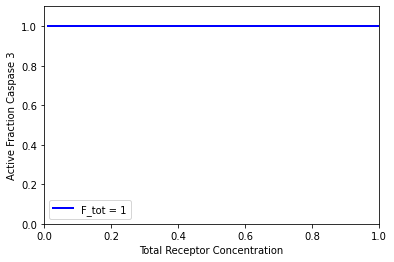

In [96]:
# STEADY-STATE responses of feedback + irreversible FLIP model

#INITIAL CONDITIONS
proC8_0 = 1
C8_0 = 0
proC3_0 = 1
C3_0 = 0
F_tot = 1

#parameters (you will need to change one of these to implement irreversible binding)
k_a = 1
k_ba = 0.001
kp = 1
km = 1
delta = 2e-4
QC8 = proC8_0*delta
QC3 = proC3_0*delta

# Here, we define our list of R_tot values:
R_values = np.linspace(0.01,5,100)

#These will be the lists that hold the results
ss_results = []

for R_tot in R_values:
    # First, we create our initial conditions
    # We do this inside the for loop because R_tot is changing
    
    #This is the case where there are less (or equal) receptors in total than FLIP in total
    ### fill in the following lines
    if (F_tot >= R_tot):
        RF_0 = R_tot
        R_0 = 0
        F_0 = F_tot - R_tot
    ###
    
    #This is the case where there are more receptors in total than FLIP in total
    ### fill in the following lines
    else:
        RF_0 = F_tot
        R_0 = R_tot - F_tot
        F_0 = 0
    ###
    states0 = [proC8_0,C8_0,proC3_0,C3_0,R_0,F_0,RF_0]
    
    # To intgrate ODEs, we need a "t" vector for time
    # Note that the units on "t" are in seconds
    t = np.linspace(0,100000,1000)
    # Now, integrate the ODEs and put the results in "solution"
    solution = odeint(caspase_FLIP_model,states0,t)
    # Now, calculate our steady state output, C3/proc3_0
    # (the concentration of cleaved caspase 3 divided by the total initial concentration of pro-caspase 3)
    norm_C3 = solution[999,3]/proC3_0
    # Append this result to the vector of our results
    ss_results.append(norm_C3)

plt.plot(R_values,ss_results,'b-',linewidth=2, label = "F_tot = " +str(F_tot))
plt.xlabel('Total Receptor Concentration')
plt.ylabel('Active Fraction Caspase 3')
# We have to add an extra directive here to make sure the y-axis prints correctly
plt.axis([0,1,0,1.1])
plt.legend()
plt.show()